**📊 Football Data Visualization: A Step-by-Step Journey At Season 2021 In The English Preimer League ⚽**

---



---



In [4]:
!pip install soccerplots


# Import Libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from soccerplots.radar_chart import Radar

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# The Dataset

In [6]:
df = pd.read_csv("Football teams.csv")
df.head(5)


,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


# Addessing Missing Data

In [8]:
df.isna().sum()

,0
Team,0
Tournament,0
Goals,0
Shots pg,0
yellow_cards,0
red_cards,0
Possession%,0
Pass%,0
AerialsWon,0
Rating,0


In [9]:
df.groupby('Tournament')['Team'].nunique()

,Team
Tournament,
Bundesliga,18
LaLiga,20
Ligue 1,20
Premier League,20
Serie A,20


# Selecting the English Preimer League

In [10]:
EPL = df[df.Tournament=='Premier League']

In [11]:
EPL.reset_index( inplace=True)
EPL.head()


,index,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85
2,7,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
3,11,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83
4,12,Liverpool,Premier League,68,16.0,40,0,59.0,85.7,14.3,6.82


In [13]:
EPL.describe()

,index,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000
mean,32.850000,51.200000,12.095000,54.750000,2.40000,49.995000,80.61000,16.610000,6.716500
std,24.841127,16.728796,2.133313,8.503095,1.63514,5.943548,4.66554,2.677371,0.130476
min,0.000000,20.000000,8.500000,40.000000,0.00000,41.000000,71.60000,12.800000,6.460000
25%,14.250000,39.000000,10.475000,48.000000,1.00000,44.250000,77.57500,14.450000,6.627500
50%,27.500000,51.000000,12.150000,53.000000,2.50000,50.350000,81.25000,16.300000,6.710000
75%,45.500000,63.500000,13.700000,61.000000,3.00000,53.525000,83.60000,18.500000,6.812500
max,93.000000,83.000000,16.000000,73.000000,6.00000,60.800000,89.40000,23.400000,7.010000


# Teams Ratings

In [14]:
team_ratings=EPL[['Team','Rating']]
team_ratings

,Team,Rating
0,Manchester City,7.01
1,Manchester United,6.85
2,Aston Villa,6.84
3,Chelsea,6.83
4,Liverpool,6.82
5,Tottenham,6.81
6,Leicester,6.80
7,Leeds,6.77
8,West Ham,6.77
9,Everton,6.73


# First 5 Rows Of Data

In [15]:
EPL.head()

,index,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85
2,7,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
3,11,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83
4,12,Liverpool,Premier League,68,16.0,40,0,59.0,85.7,14.3,6.82


In [16]:
sorted_goals=EPL.sort_values('Goals', ascending = False  )
most_goals= sorted_goals.iloc[0]
lowest_goals= sorted_goals[-1:]
avg_goals=EPL["Goals"].mean()


# ✅ Highlighted top-scoring and lowest-scoring teams

Man City Was Dominating

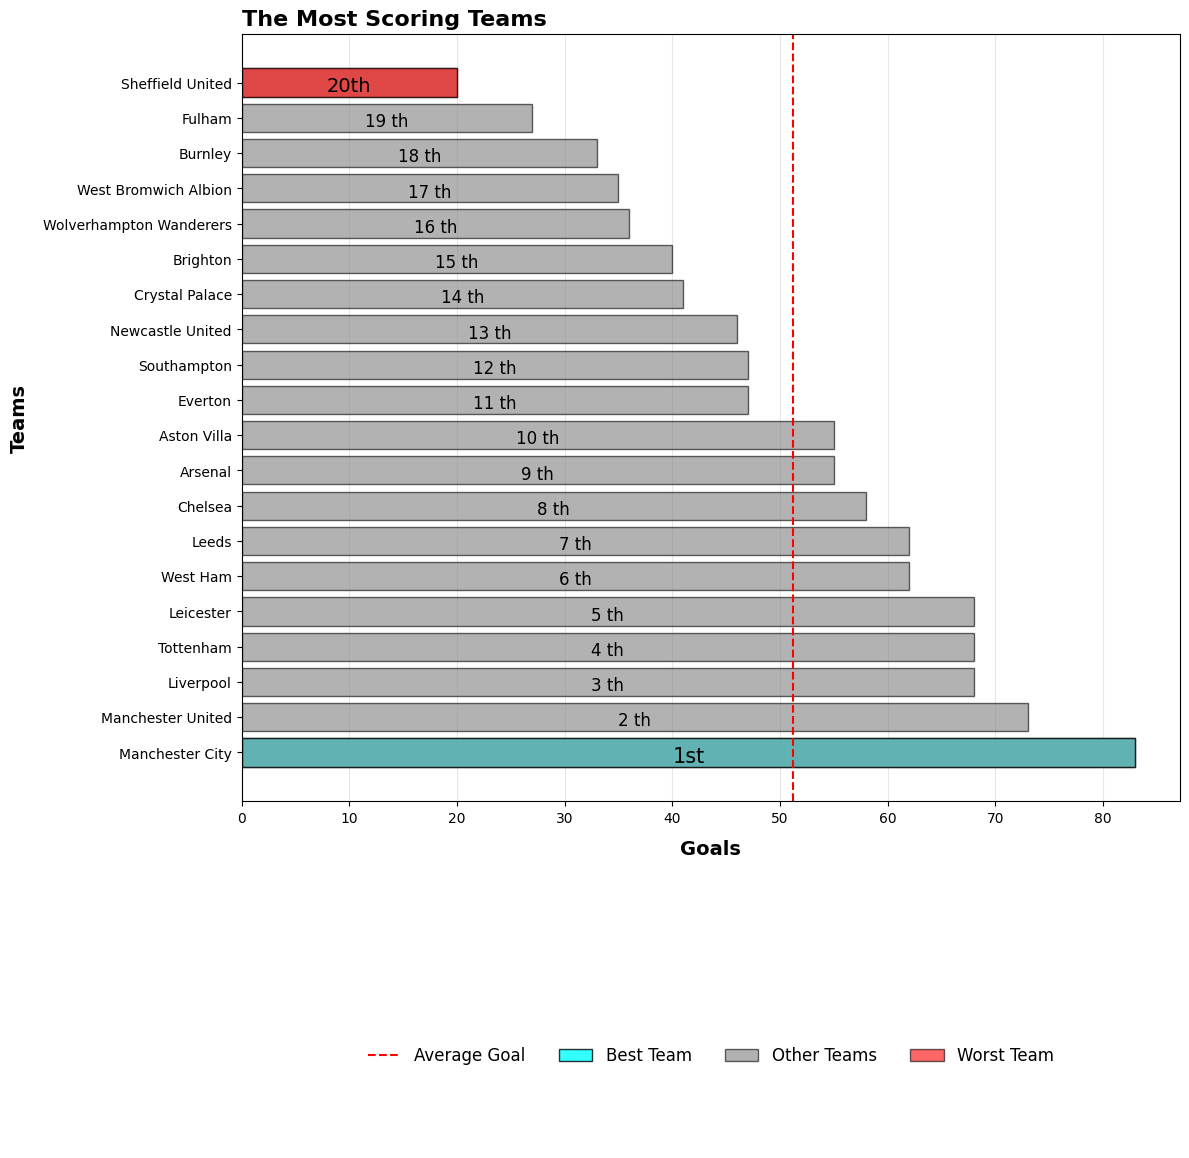

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
bar1 = ax.barh(most_goals['Team'] , most_goals['Goals'], color='cyan', alpha=0.8 , edgecolor= 'black')
bar0 = ax.barh(sorted_goals['Team'] , sorted_goals['Goals'], color='gray' ,alpha = .6 , edgecolor= 'black')
bar2 = ax.barh(lowest_goals['Team'] , lowest_goals['Goals'], color='red', alpha=0.6,edgecolor= 'black' )

ax.grid(axis='x' , alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Goals", fontsize=14, labelpad=10, fontweight='bold', )
ax.set_ylabel("Teams", fontsize=14, labelpad=10, fontweight='bold',)
avg_line = ax.axvline(avg_goals , color ='r' , linestyle='--' )


ax.legend(["Average Goal", "Best Team", "Other Teams" ,"Worst Team"], loc='upper center',
          bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=5, frameon=False, fontsize=12)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Avarage\nGoal: {:.2f}".format(avg_goals),
    y=ymax-4,
    x=avg_goals+1,
    fontsize=14,
    fontweight='bold',
    rotation=270,
    color='white'
)


for i , bar in enumerate(bar0):
  x=bar.get_width(),
  y=bar.get_y(),
  if i != 0 and i != 19 :
    ax.text(
        s=f"{i + 1 } th",
        va='center', ha='center',
        x=x[0]/2, y=y[0]+0.30,
        size = 12
    )

for i , bar in enumerate(bar1):
  x=bar.get_width(),
  y=bar.get_y(),
  ax.text(
        s=f"1st",
        va='center', ha='center',
        x=x[0]/2, y=y[0]+0.30,
        size = 15
    )

for i , bar in enumerate(bar2):
  x=bar.get_width(),
  y=bar.get_y(),
  ax.text(
        s=f"20th",
        va='center', ha='center',
        x=x[0]/2, y=y[0]+0.30,
        size = 14
    )


plt.title("The Most Scoring Teams" , fontweight='bold', fontsize=16, loc='left')
plt.tight_layout()
plt.show()







# Most carded Teams

most aggresive teams on fouls

In [18]:
total_cards = EPL['yellow_cards'] + EPL['red_cards']
EPL['total_cards'] = total_cards
EPL[['Team','total_cards']].sort_values( 'total_cards', ascending=False)

<ipython-input-18-38567c49112a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL['total_cards'] = total_cards


,Team,total_cards
19,Sheffield United,76
14,Fulham,70
2,Aston Villa,67
1,Manchester United,65
16,Newcastle United,64
7,Leeds,62
6,Leicester,61
9,Everton,61
17,Crystal Palace,56
18,West Bromwich Albion,55


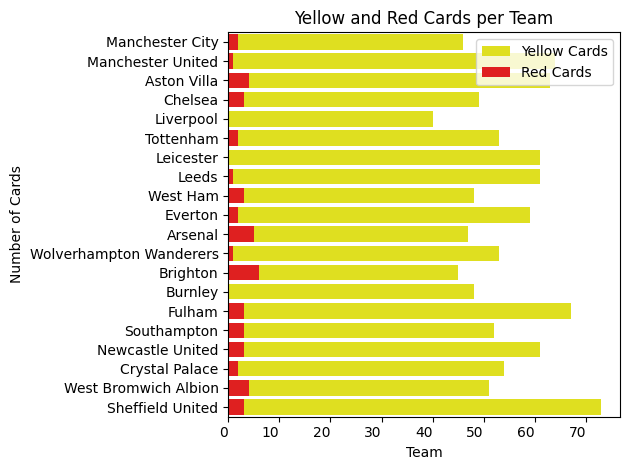

In [19]:
ax = sns.barplot(y="Team", x="yellow_cards", data=EPL, color="yellow", label="Yellow Cards" )
sns.barplot( x="red_cards",y="Team", data=EPL, color="red", ax=ax, label="Red Cards")

ax.set_ylabel("Number of Cards")
ax.set_xlabel("Team")
ax.set_title("Yellow and Red Cards per Team")
ax.legend()
plt.xticks(ha="right")
plt.tight_layout()
plt.show()

# ✅ Highlighted top-shooting and lowest-shooting teams


In [20]:
sorted_shots = EPL.sort_values(by="Shots pg",ascending=False)
sorted_shots.reset_index(inplace=True)
goal_top = sorted_shots.iloc[0:1]
goal_bot = sorted_shots.iloc[-1]
avg_shots = EPL['Shots pg'].mean()
epl_idx = list(sorted_shots.index + 1)

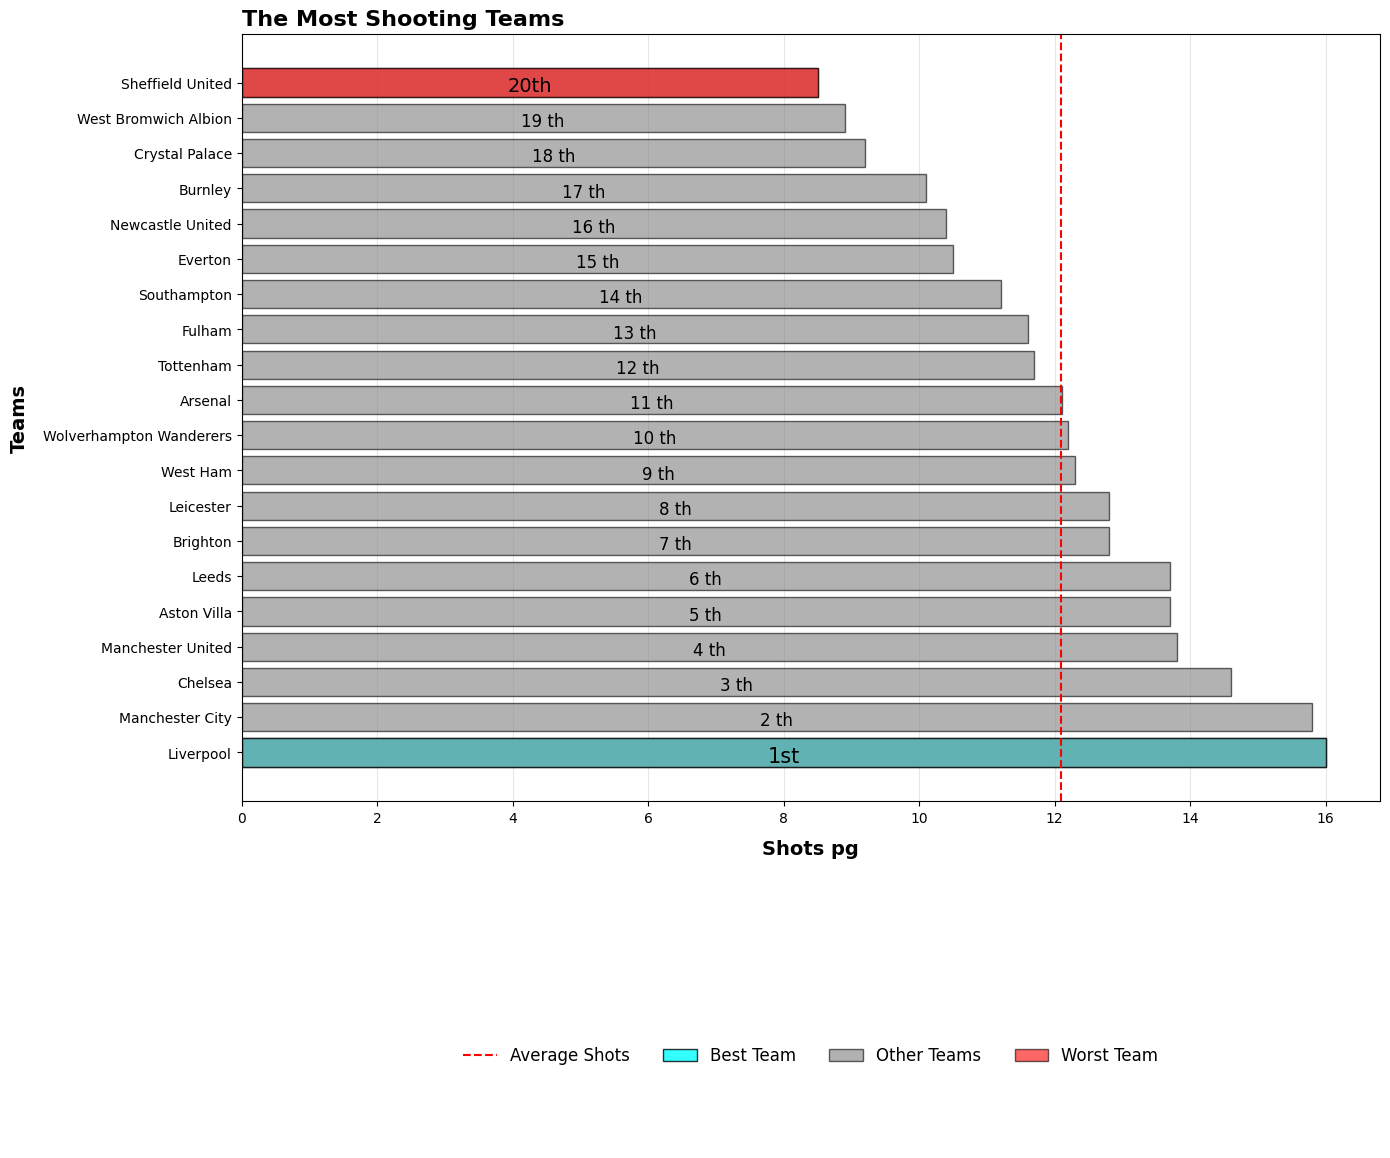

In [21]:
fig, ax = plt.subplots(figsize=(14,12))


bar1 = ax.barh(goal_top['Team'] , goal_top['Shots pg'], color='cyan', alpha=0.8 , edgecolor= 'black')
bar0 = ax.barh(sorted_shots['Team'] , sorted_shots['Shots pg'], color='gray' ,alpha = .6 , edgecolor= 'black')
bar2 = ax.barh(goal_bot['Team'] , goal_bot['Shots pg'], color='red', alpha=0.6,edgecolor= 'black' )

ax.grid(axis='x' , alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Shots pg", fontsize=14, labelpad=10, fontweight='bold', )
ax.set_ylabel("Teams", fontsize=14, labelpad=10, fontweight='bold',)
avg_line = ax.axvline(avg_shots , color ='r' , linestyle='--' )


ax.legend(["Average Shots", "Best Team", "Other Teams" ,"Worst Team"], loc='upper center',
          bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=5, frameon=False, fontsize=12)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Avarage\nShots: {:.2f}".format(avg_shots),
    y=ymax-4,
    x=avg_shots+1,
    fontsize=14,
    fontweight='bold',
    rotation=270,
    color='white'
)


for i , bar in enumerate(bar0):
  x=bar.get_width(),
  y=bar.get_y(),
  if i != 0 and i != 19 :
    ax.text(
        s=f"{i + 1 } th",
        va='center', ha='center',
        x=x[0]/2, y=y[0]+0.30,
        size = 12
    )

for i , bar in enumerate(bar1):
  x=bar.get_width(),
  y=bar.get_y(),
  ax.text(
        s=f"1st",
        va='center', ha='center',
        x=x[0]/2, y=y[0]+0.30,
        size = 15
    )

for i , bar in enumerate(bar2):
  x=bar.get_width(),
  y=bar.get_y(),
  ax.text(
        s=f"20th",
        va='center', ha='center',
        x=x[0]/2, y=y[0]+0.30,
        size = 14
    )


plt.title("The Most Shooting Teams" , fontweight='bold', fontsize=16, loc='left')
plt.tight_layout()
plt.show()




# **Possession % vs Team Rating**

 Some Teams are dominating the possession but have avg rating "Arsenal"
Some Teams have lower possession but playing more direct "West Ham"


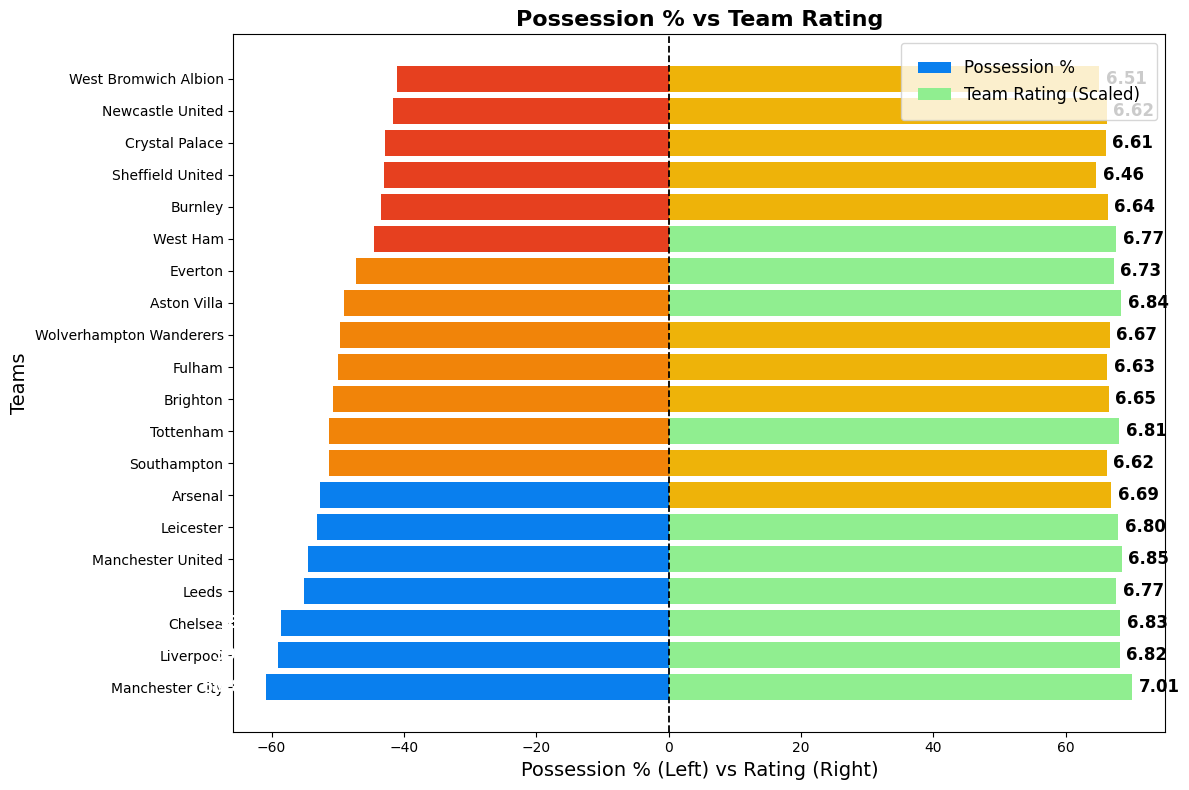

In [56]:
df_sorted = EPL.sort_values(by="Possession%", ascending=False)
teams = df_sorted["Team"]

# Define values
possession = -df_sorted["Possession%"]  # Make possession negative for left side
rating = df_sorted["Rating"] *10  # Scale rating to match possession

# Define colors based on rating
pos_colors = ["#e6401f" if 40 <= -r < 47 else "#097fee" for r in possession]
pos_colors = ["#f18409" if 47 <= -r < 52 else color for r, color in zip(possession, pos_colors)]
rating_colors = ["#eeb309" if 6.4 <= r/10 < 6.7 else "lightgreen" for r in rating]


# Set figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
ax.barh(teams, possession, color=pos_colors, label="Possession %" ,  )
ax.barh(teams, rating, color=rating_colors, label="Team Rating (Scaled)")

# Add labels
for i, (pos, rat, color) in enumerate(zip(possession, rating, rating_colors)):
    ax.text(pos - 1, i, f"{-pos:.1f}%", va='center', ha='right', fontsize=12, color="white", fontweight="bold")
    ax.text(rat + 1, i, f"{rat / 10:.2f}", va='center', fontsize=12, color="black", fontweight="bold")

# Adjust x-axis limits for better visualization
ax.set_xlim([min(possession) - 5, max(rating) + 5])

# Titles
ax.axvline(0, color='black', linewidth=1.3, linestyle='--')
ax.set_xlabel("Possession % (Left) vs Rating (Right)", fontsize=14)
ax.set_ylabel("Teams", fontsize=14)
ax.set_title("Possession % vs Team Rating", fontsize=16, fontweight="bold")
ax.legend( ncol=1, borderpad=1, frameon=True , fontsize=12)

plt.tight_layout()
plt.show()


# **🔹 Step 3: Shot Accuracy - Goals per Shot Attempted**

<ipython-input-24-db0a2da072d6>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Team", y="Shot_Conversion%", data=sorted_teams ,palette="magma")


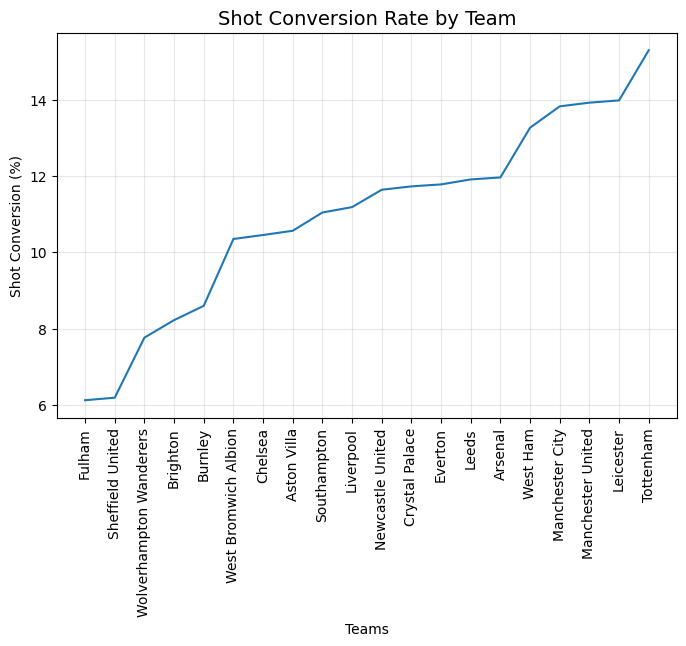

In [24]:
# Sort by Shot Conversion %
sorted_teams = EPL.sort_values(by="Shot_Conversion%", ascending=True)

plt.figure(figsize=(8, 5))
sns.lineplot(x="Team", y="Shot_Conversion%", data=sorted_teams ,palette="magma")

plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Shot Conversion (%)")
plt.title("Shot Conversion Rate by Team", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


<ipython-input-25-e851ae6fa922>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL["Shot_Conversion%"] = (EPL["Goals"] / (EPL["Shots pg"] * 38)) * 100  # Assuming full season


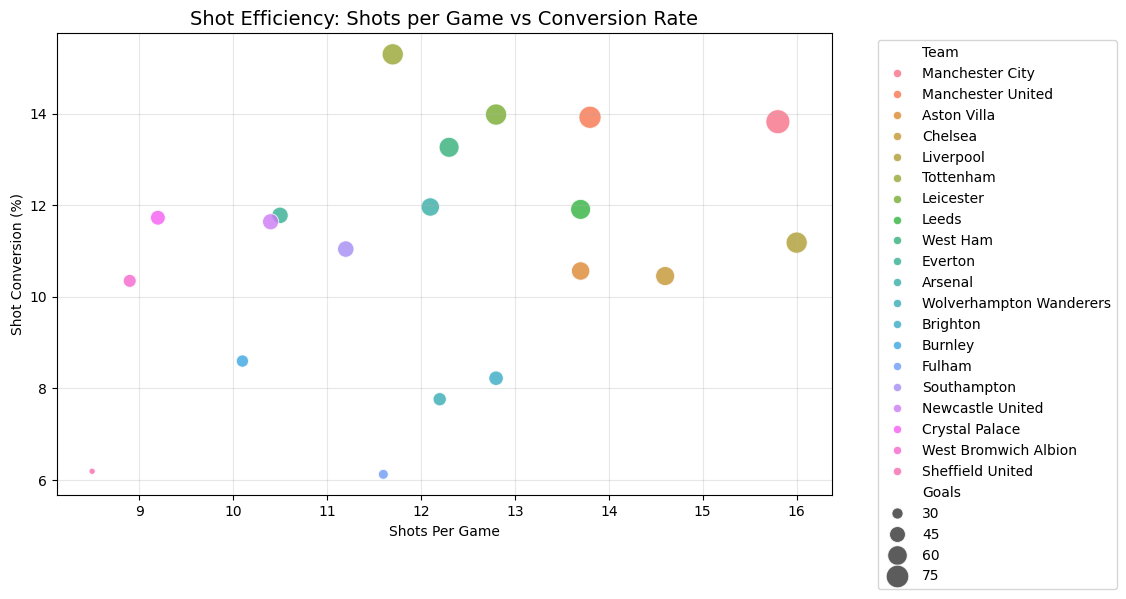

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Shot Conversion %
EPL["Shot_Conversion%"] = (EPL["Goals"] / (EPL["Shots pg"] * 38)) * 100  # Assuming full season

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=EPL["Shots pg"],
    y=EPL["Shot_Conversion%"],
    hue=EPL["Team"],
    size=EPL["Goals"],
    sizes=(20, 300),
    alpha=0.8
)

plt.xlabel("Shots Per Game")
plt.ylabel("Shot Conversion (%)")
plt.title("Shot Efficiency: Shots per Game vs Conversion Rate", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.show()



#**Radar Chart for Performance Comparison For The Top 5 Teams**
it seems That Aston villa is playing more of high balls
man city are dominating the possession and passes
liverpool tries shooting more than any team

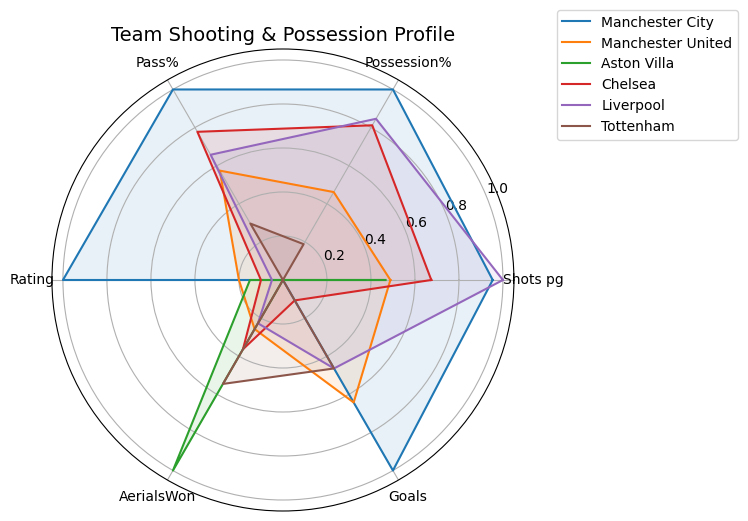

In [26]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# Select top teams
teams = EPL.loc[:5, ["Team", "Shots pg", "Possession%", "Pass%","Rating","AerialsWon","Goals"]]
categories = list(teams.columns[1:])

# Normalize data (scale between 0-1)
teams_normalized = teams.copy()
for col in categories:
    teams_normalized[col] = (teams[col] - teams[col].min()) / (teams[col].max() - teams[col].min())

# Convert to radar chart format
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, row in teams_normalized.iterrows():
    values = row[categories].tolist() + [row[categories].tolist()[0]]
    ax.plot(angles, values, label=row["Team"])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Team Shooting & Possession Profile", fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.1))
plt.show()


<ipython-input-58-20da4ff83094>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["10%", "20%", "30%", "40%", "50%"], fontsize=12, rotation=90 )


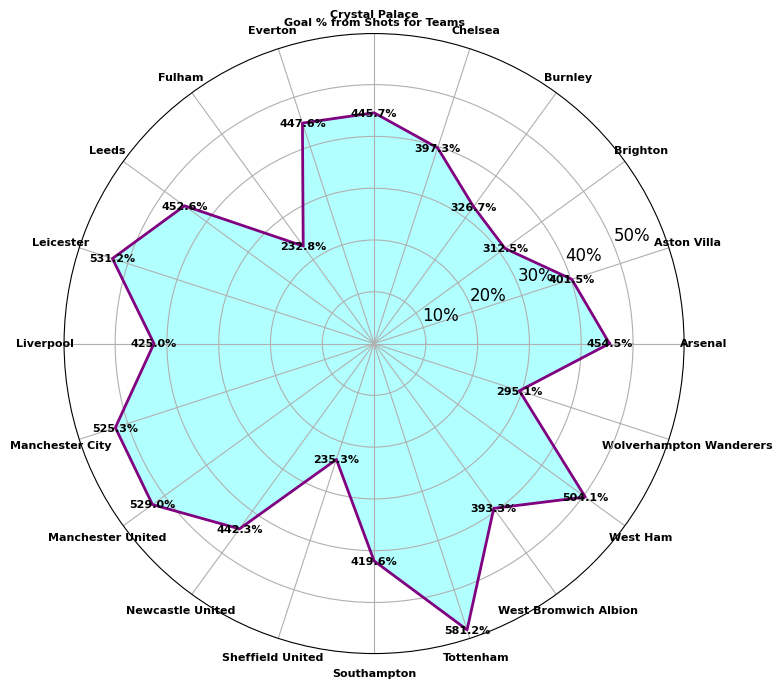

In [58]:
from math import pi
import matplotlib.pyplot as plt
from math import pi
import matplotlib.pyplot as plt
import numpy as np



team_shots = EPL[["Team", "Shots pg"]]
goals = EPL[["Team", "Goals"]]
team_shots = team_shots.groupby("Team")["Shots pg"].sum()
team_goals = goals.groupby("Team")["Goals"].sum()
team_conversion = (team_goals / team_shots).fillna(0) * 100  # Convert to %

teams = team_conversion.index.tolist()
values = team_conversion.values.tolist()

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(teams), endpoint=False).tolist()
values += values[:1]  # Close the chart
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(polar=True))

ax.fill(angles, values, color="cyan", alpha=0.3)
ax.plot(angles, values, color="purple", linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(teams, fontsize= 8, fontweight="bold", rotation=45)
ax.set_yticklabels(["10%", "20%", "30%", "40%", "50%"], fontsize=12, rotation=90 )
ax.set_title("Goal % from Shots for Teams", fontsize=8, fontweight="bold")
for i in range(len(teams)):
    ax.text(angles[i], values[i], f'{values[i]:.1f}%', ha='center', va='center', fontsize=8, fontweight='bold')
plt.show()

